In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data_10000.csv",usecols = ['Date','Order_Demand'])
df.columns=['Date','Order_Demand']
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df = df.set_index('Date')
df.head()

,Order_Demand,Year
Date,,
2012-07-27,100,2012
2012-01-19,500,2012
2012-02-03,500,2012
2012-02-09,500,2012
2012-03-02,500,2012


In [3]:
df.to_csv('with_year.csv')
df2 = pd.read_csv("with_year.csv",usecols = ['Year','Order_Demand'])
#print(df2.head())
df2.columns=['Year','Order_Demand']
df2 = df2.set_index('Year')

In [4]:
df3 = pd.read_csv("with_avg.csv",usecols = ['Year','Order_Demand'])
df3 = df3.set_index('Year')
print(df3)

      Order_Demand
Year              
2011         32195
2012         15924
2013         23676
2014         15000
2015         29030
2016         33020
2017         30200
2018         35090
2019         28900
2020         29008
2021         30132


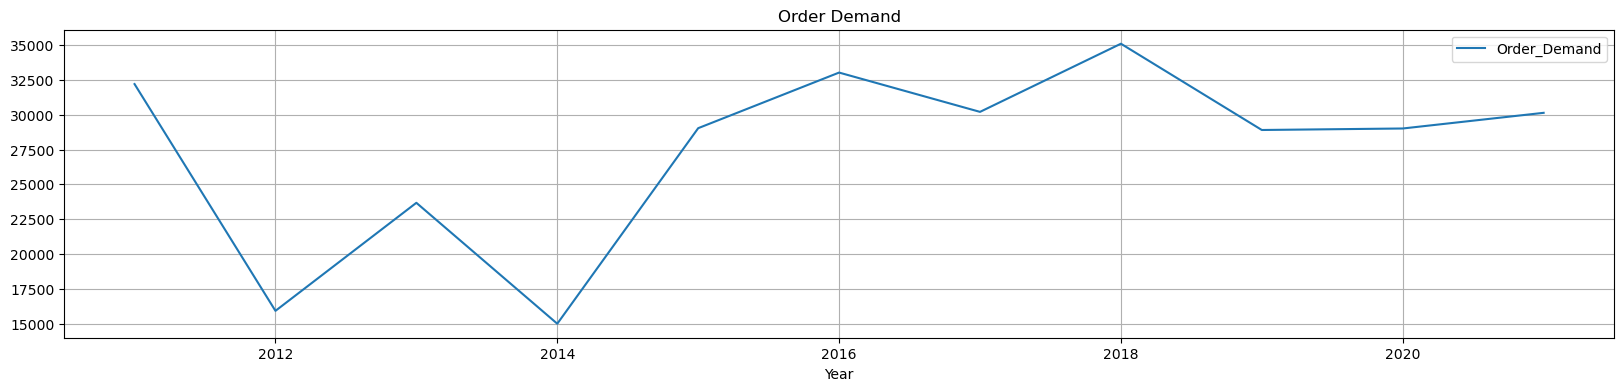

In [5]:
df3.plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Order Demand')
plt.show(block=False)

In [6]:
train_len = 6
train = df3[0:train_len]
test = df3[train_len:] 

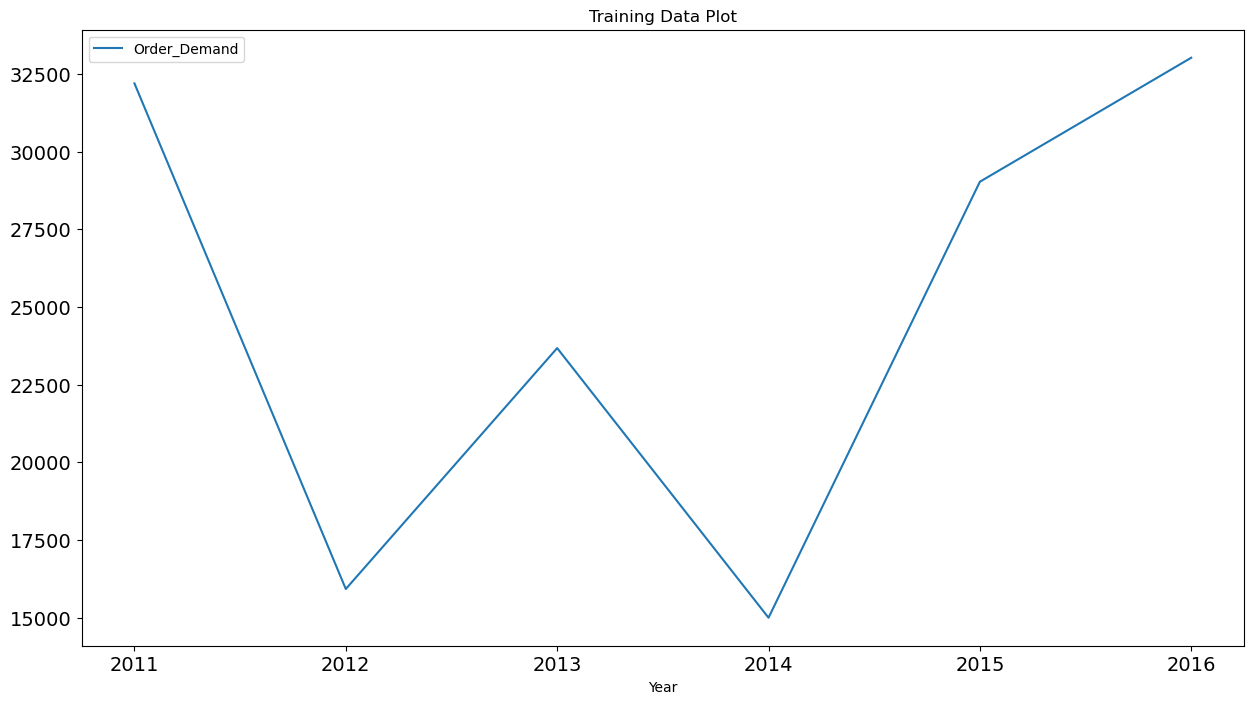

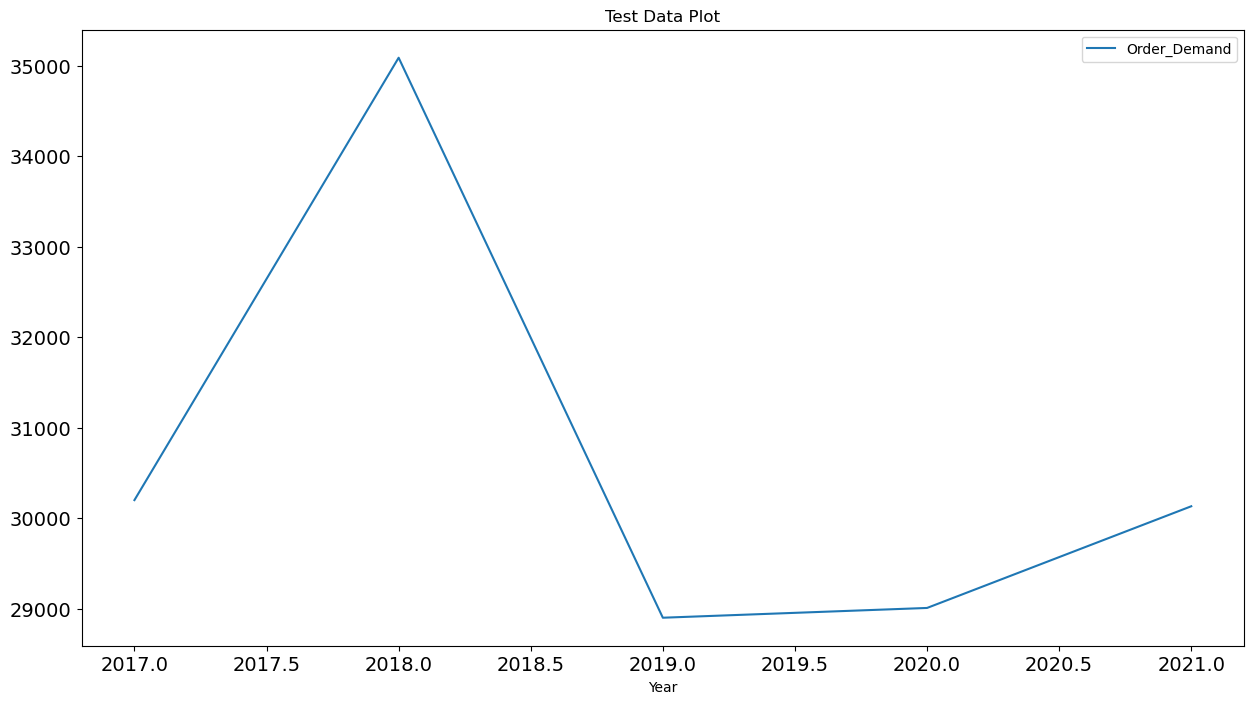

In [7]:
train.plot(figsize=(15,8), title= 'Training Data Plot', fontsize=14)

test.plot(figsize=(15,8), title= 'Test Data Plot', fontsize=14)
plt.show()

In [9]:
y_hat_sma = df3.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = df3['Order_Demand'].rolling(ma_window).mean()


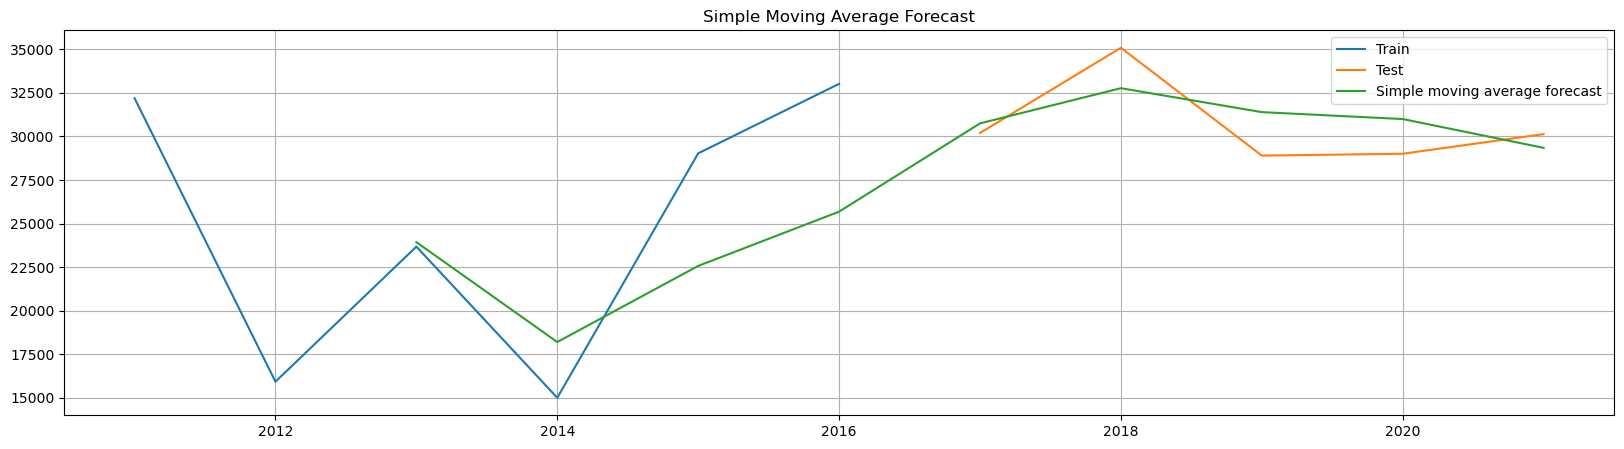

In [10]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Order_Demand'], label='Train')
plt.plot(test['Order_Demand'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Forecast')
plt.show()

In [11]:
import math 
from sklearn.metrics import mean_squared_error
test=test.append(train)
y_hat_sma['sma_forecast'] = y_hat_sma['sma_forecast'].fillna(17000)
#debugging
# print("actual")
# print(test)
# print("predicted")
# print(y_hat_sma['sma_forecast'])
mse = mean_squared_error(test,y_hat_sma['sma_forecast'])
rmse = math.sqrt(mse)  
print("MSE")
print(mse)
print("RSME")
print(rmse)

MSE
121029505.030303
RSME
11001.341055994173
